In [209]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import time
from numba import njit
from matplotlib.colors import ListedColormap

In [127]:
suits = ['Clubs', 'Diamonds', 'Hearts', 'Spades']
ranks = [2,3,4,5,6,7,8,9,10,'J','Q','K','A']
list_deck = [[suit, rank] for suit in suits for rank in ranks]
arr_deck = np.array(list_deck)
df_deck = pd.DataFrame(arr_deck, columns = ('Suit', 'Rank'))
int_deck = np.arange(52)
def get_card(x):
    suits = ['Clubs', 'Diamonds', 'Hearts', 'Spades']
    ranks = ['2','3','4','5','6','7','8','9','10','J','Q','K','A']
    suit = suits[x // 13]
    rank = ranks[x % 13]

    return (suit, rank)

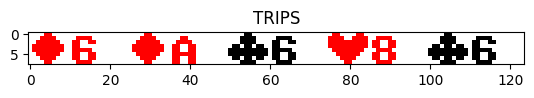

In [466]:
rank_sprites = {
    0: np.array([[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [ 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [ 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [ 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [ 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0 ]]), 
    1: np.array([[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [ 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [ 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [ 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [ 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [ 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0 ]]), 
    2: np.array([[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [ 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [ 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [ 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [ 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [ 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0 ]]), 
    3: np.array([[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [ 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [ 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [ 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0 ]]), 
    4: np.array([[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [ 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [ 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0 ]]), 
    5: np.array([[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [ 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [ 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [ 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [ 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [ 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [ 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]]), 
    6: np.array([[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [ 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [ 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [ 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0 ]]), 
    7: np.array([[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [ 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [ 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [ 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [ 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [ 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]]), 
    8: np.array([[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [ 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0], [ 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1], [ 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1], [ 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1], [ 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1], [ 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1], [ 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0 ]]), 
    9: np.array([[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [ 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [ 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [ 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [ 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [ 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]]), 
    10: np.array([[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [ 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [ 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [ 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0 ]]), 
    11: np.array([[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0 ]]), 
    12: np.array([[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [ 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [ 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [ 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0 ]]),
    'width': 13,
    'height': 8
}
suit_sprites = {
    0: np.array([[ 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], [ 0, 0, 0, 1, 1, 1, 1, 0, 0, 0], [ 0, 0, 0, 1, 1, 1, 1, 0, 0, 0], [ 0, 1, 1, 0, 1, 1, 0, 1, 1, 0], [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [ 0, 1, 1, 0, 1, 1, 0, 1, 1, 0], [ 0, 0, 0, 1, 1, 1, 1, 0, 0, 0 ]]), 
    1: np.array([[ 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], [ 0, 0, 0, 1, 1, 1, 1, 0, 0, 0], [ 0, 0, 1, 1, 1, 1, 1, 1, 0, 0], [ 0, 1, 1, 1, 1, 1, 1, 1, 1, 0], [ 0, 1, 1, 1, 1, 1, 1, 1, 1, 0], [ 0, 0, 1, 1, 1, 1, 1, 1, 0, 0], [ 0, 0, 0, 1, 1, 1, 1, 0, 0, 0], [ 0, 0, 0, 0, 1, 1, 0, 0, 0, 0 ]]), 
    2: np.array([[ 0, 1, 1, 0, 0, 0, 0, 1, 1, 0], [ 1, 1, 1, 1, 0, 0, 1, 1, 1, 1], [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [ 0, 1, 1, 1, 1, 1, 1, 1, 1, 0], [ 0, 0, 1, 1, 1, 1, 1, 1, 0, 0], [ 0, 0, 0, 1, 1, 1, 1, 0, 0, 0], [ 0, 0, 0, 0, 1, 1, 0, 0, 0, 0 ]]), 
    3: np.array([[ 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], [ 0, 0, 0, 1, 1, 1, 1, 0, 0, 0], [ 0, 0, 1, 1, 1, 1, 1, 1, 0, 0], [ 0, 1, 1, 1, 1, 1, 1, 1, 1, 0], [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [ 0, 1, 1, 0, 1, 1, 0, 1, 1, 0], [ 0, 0, 0, 1, 1, 1, 1, 0, 0, 0 ]]),
    'width': 10,
    'height': 8
}

def image_cards(cards, figsize = None):
    num_cards = len(cards)
    image = np.zeros((8, num_cards * 25 - 1))
    cmap = ListedColormap(['#FFFFFF', '#FF0000', '#000000'])
    for i in range(num_cards):
        rank = cards[i] % 13
        suit = cards[i] // 13
        y_position = i * 25
        col = 2 if ((suit == 0) or (suit == 3)) else 1
        image[:, y_position:(y_position + 10)] = suit_sprites[suit] * col
        image[:, (y_position + 11):(y_position + 24)] = rank_sprites[rank] * col
    plt.figure(figsize = figsize)
    plt.imshow(image, cmap = cmap)
    title = CAT_FLAG_NAMES[eval_flags_and_category(cards)[0]]
    plt.title(title)

image_cards(np.random.choice(np.arange(52), 5))

In [118]:
def is_pair(cards):
    cards = cards % 13
    for i in range(5):
        for j in range(i + 1, 5):
            if cards[i] == cards[j]:
                return True
    return False

def is_jacks_or_better(cards):
    cards = cards % 13
    for i in range(5):
        if cards[i] < 8:
            continue
        for j in range(i + 1, 5):
            if cards[i] == cards[j]:
                return True
    return False

def is_two_pair(cards):
    cards = cards % 13
    one_pair = False
    one_pair_val = 13
    for i in range(5):
        for j in range(i + 1, 5):
            if one_pair:
                if cards[i] == one_pair_val:
                    break
                elif cards[i] == cards[j]:
                    return True
            else:
                if cards[i] == cards[j]:
                    one_pair = True
                    one_pair_val = cards[i]
                    break
    return False

def is_two_pair(cards):
    card_counts = np.zeros(13, dtype = np.uint8)
    pairs = 0
    for i in cards:
        card_counts[i] += 1
    for i in card_counts:
        if i >= 2:
            pairs += 1
    if pairs >= 2:
        return True
    else:
        return False
    
def is_three_of_a_kind(cards):
    cards = cards % 13
    for i in range(0,3):
        count = 0
        for j in range(i + 1, 5):
            if cards[i] == cards[j]:
                count += 1
        if count >= 2:
            return True
    return False

def is_straight(cards):
    present = np.zeros(14, dtype = np.uint8)
    for i in cards:
        r = i % 13 + 1
        present[r] = 1
    present[0] = present[13]
    
    distinct = 0
    for i in range(13):
        distinct += present[i]
    if distinct < 5:
        return False

    w = present[0] + present[1] + present[2] + present[3] + present[4]
    for i in range(1, 10):
        w += present[i + 4] - present[i - 1]
        if w == 5:
            return True
    return False

def is_flush(cards):
    cards = cards // 13
    for i in range(1, 5):
        if not cards[0] == cards[i]:
            return False
    return True
            
def is_four_of_a_kind(cards):
    cards = cards % 13
    for i in range(2):
        count = 0
        for j in range(i + 1, 5):
            if cards[i] == cards[j]:
                count += 1
        if count == 3:
            return True
    return False

def is_full_house(cards):
    cards = cards % 13
    minimum = 13
    maximum = -1
    for i in range(5):
        if cards[i] < minimum:
            minimum = cards[i]
        if cards[i] > maximum:
            maximum = cards[i]
    min_count = 0
    max_count = 0
    for i in range(5):
        if cards[i] == minimum:
            min_count += 1
        if cards[i] == maximum:
            max_count += 1
    if ((minimum == 3) and (maximum == 2)) or ((minimum == 2) and (maximum == 3)):
        return True
    else:
        return False

def is_straight_flush(cards):
    if is_flush(cards) and is_straight(cards):
        return True
    else:
        return False
        
def is_royal_flush(cards):
    minimum = 13
    for i in range(5):
        if cards[i] < minimum:
            minimum = cards[i]
    if minimum < 8:
        return False
    elif is_flush(cards) and is_straight(cards):
        return True
    else:
        return False

def full_check_hand(cards):
    if is_royal_flush(cards):
        return 10
    elif is_straight_flush(cards):
        return 9
    elif is_full_house(cards):
        return 8
    elif is_four_of_a_kind(cards):
        return 7
    elif is_flush(cards):
        return 6
    elif is_straight(cards):
        return 5
    elif is_three_of_a_kind(cards):
        return 4
    elif is_two_pair(cards):
        return 3
    elif is_jacks_or_better(cards):
        return 2
    elif is_pair(cards):
        return 1
    else:
        return 0

In [688]:
# Bit positions (flags). Keep these constants in one place.
ANY_PAIR         = 0  # has any 1 pair
TWO_PAIR         = 1
TRIPS            = 2
STRAIGHT         = 3
FLUSH            = 4
FULL_HOUSE       = 5
QUADS            = 6
STRAIGHT_FLUSH   = 7
ROYAL_RANKS      = 8  # ranks 10,J,Q,K,A present (regardless of flush)
JACKS_OR_BETTER  = 9  # has a pair of 10/J/Q/K/A
ROYAL_FLUSH      = 10 # classic royal flush (T..A + flush)

# Category code for “best hand” (poker ordering)
CAT_HIGH_CARD        = 0
CAT_PAIR             = 1
CAT_JACKS_OR_BETTER  = 2
CAT_TWO_PAIR         = 3
CAT_TRIPS            = 4
CAT_STRAIGHT         = 5
CAT_FLUSH            = 6
CAT_FULL_HOUSE       = 7
CAT_QUADS            = 8
CAT_STRAIGHT_FLUSH   = 9
CAT_ROYAL_FLUSH      = 10

CAT_FLAG_NAMES = {
    0: 'HIGH_CARD',
    1: 'PAIR',
    2: 'JACKS_OR_BETTER',
    3: 'TWO_PAIR',
    4: 'TRIPS',
    5: 'STRAIGHT',
    6: 'FLUSH',
    7: 'FULL_HOUSE',
    8: 'QUADS',
    9: 'STRAIGHT_FLUSH',
    10: 'ROYAL_FLUSH'
}

@njit
def eval_flags_and_category(cards):
    """
    cards: length-5 array of 0..51
    returns: (category_code:int, flags:int)
    Flags are additive (multiple bits may be set).
    """
    # one pass: counts, rank bitmask, flush
    cnt  = np.zeros(13, np.uint8)
    mask = 0
    s0   = cards[0] // 13
    fl   = True
    for i in range(5):
        r = cards[i] % 13
        cnt[r] += 1
        mask |= 1 << r
        if (cards[i] // 13) != s0:
            fl = False
    
    # multiples
    pairs = 0
    trips = False
    quads = False
    high_pair = False  # 10/J/Q/K/A
    for r in range(13):
        c = cnt[r]
        if c == 4:
            quads = True
        elif c == 3:
            trips = True
        elif c == 2:
            pairs += 1
            if r >= 9:  # 8..12 == 10..A
                high_pair = True

    # straight (bit-window) + wheel
    st = False
    for start in range(9):               # windows 0..4 .. 8..12
        if ((mask >> start) & 0x1F) == 0x1F:
            st = True
            break
    if not st:
        wheel = (1<<12)|(1<<0)|(1<<1)|(1<<2)|(1<<3)  # A,2,3,4,5
        st = (mask & wheel) == wheel

    # flags
    flags = 0
    if (pairs >= 1) or (trips) or (quads):          flags |= 1 << ANY_PAIR
    if (pairs == 2) or ((pairs == 1) and (trips)):          flags |= 1 << TWO_PAIR
    if trips:               flags |= 1 << TRIPS
    if st:                  flags |= 1 << STRAIGHT
    if fl:                  flags |= 1 << FLUSH
    if trips and pairs>=1:  flags |= 1 << FULL_HOUSE
    if quads:               flags |= 1 << QUADS
    if st and fl:           flags |= 1 << STRAIGHT_FLUSH

    if ((mask >> 8) & 0x1F) == 0x1F:   # 10..A present
        flags |= 1 << ROYAL_RANKS
        if fl:                          # => royal flush
            flags |= 1 << ROYAL_FLUSH
    if high_pair:           flags |= 1 << JACKS_OR_BETTER

    # category (mutually exclusive best hand)
    if (flags >> ROYAL_FLUSH) & 1:           cat = CAT_ROYAL_FLUSH
    elif (flags >> STRAIGHT_FLUSH) & 1:      cat = CAT_STRAIGHT_FLUSH
    elif (flags >> QUADS) & 1:               cat = CAT_QUADS
    elif (flags >> FULL_HOUSE) & 1:          cat = CAT_FULL_HOUSE
    elif (flags >> FLUSH) & 1:               cat = CAT_FLUSH
    elif (flags >> STRAIGHT) & 1:            cat = CAT_STRAIGHT
    elif (flags >> TRIPS) & 1:               cat = CAT_TRIPS
    elif (flags >> TWO_PAIR) & 1:            cat = CAT_TWO_PAIR
    elif (flags >> JACKS_OR_BETTER) & 1:     cat = CAT_JACKS_OR_BETTER
    elif (flags >> ANY_PAIR) & 1:            cat = CAT_PAIR
    else:                                    cat = CAT_HIGH_CARD

    return cat, flags

# Pretty print only the flags you’ve named
FLAG_NAMES = {
    0: "ANY_PAIR",
    1: "TWO_PAIR",
    2: "TRIPS",
    3: "STRAIGHT",
    4: "FLUSH",
    5: "FULL_HOUSE",
    6: "QUADS",
    7: "STRAIGHT_FLUSH",
    8: "ROYAL_RANKS",
    9: "JACKS_OR_BETTER",
    10: "ROYAL_FLUSH",
}

def get_hands(flags):
    hands = []
    for i in range(flags.bit_length()):
        if (flags & (1 << i)):
            hands.append(FLAG_NAMES[i])
    return hands

def expected_return(outcomes, payouts):
    n_samples = len(outcomes)
    unique_vals, unique_counts = np.unique(outcomes, return_counts = True)
    expected_return = 0
    for i in range(len(unique_vals)):
        val = unique_vals[i]
        percentage = unique_counts[i] / n_samples
        expected_return += payouts[val] * percentage
    return expected_return

def input_returns():
    returns = []
    for i in CAT_FLAG_NAMES:
        print(CAT_FLAG_NAMES[i], ': ')
        val = input()
        returns.append(float(val))
    print(pd.DataFrame(returns, index = CAT_FLAG_NAMES.values()))
    return returns

In [473]:
@njit
def count_royal_flush(n_samples):
    target = np.array([0,0,0,0,0,0,0,0,1,1,1,1,1])
    deck = np.arange(52)
    hits = 0
    m = n_samples // 10_000                    # int
    first_hand = np.empty(m, dtype=np.uint8)   # or zeros/full if you want
    cardos = np.empty((m, 10), dtype = np.uint8)

    counter = 0

    for _ in range(n_samples):
        # partial Fisher–Yates to get 5 unique cards in deck[:5]
        for i in range(10):
            j = np.random.randint(i, 52)
            deck[i], deck[j] = deck[j], deck[i]

        full_hand = deck[:10]
        count_arr = np.zeros(4, dtype = np.uint8)

        for i in full_hand[:5]:
            if target[i % 13]:
                if i // 13 == 0:
                    count_arr[0] += 1
                elif i // 13 == 1:
                    count_arr[1] += 1
                elif i // 13 == 2:
                    count_arr[2] += 1
                elif i //13 == 3:
                    count_arr[3] += 1

        best_ind = 0
        best_count = count_arr[0]
        for i in range(1,4):
            if count_arr[i] > best_count:
                best_count = count_arr[i]
                best_ind = i
        if best_count == 0:
            best_ind = full_hand[5] // 13
        for i in range(5,10):
            card = full_hand[i]
            if card // 13 != best_ind:
                break
            else:
                if not target[card % 13]:
                    break
                else:
                    count_arr[best_ind] += 1
        if count_arr[best_ind] == 5:
            first_hand_total = 0
            for i in full_hand[:5]:
                suit_cond = (i // 13 == best_ind)
                rank_cond = target[i % 13]
                if suit_cond and rank_cond:
                    first_hand_total += 1
            cardos[counter] = full_hand.copy()
            first_hand[counter] = first_hand_total
            counter += 1
            hits += 1
    return hits, first_hand, cardos

@njit
def straight_011110(n_samples):
    deck = np.array([ 0,  1,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51])
    hand = np.array([2, 3, 17, 29, 31])

    sixes_outcomes = np.zeros(n_samples, dtype=np.uint8)
    straight_outcomes = np.zeros(n_samples, dtype=np.uint8)
    
    for _ in range(n_samples):
        for i in range(6):
            j = np.random.randint(i, 47)
            deck[i], deck[j] = deck[j], deck[i]

        hold_pair = eval_flags_and_category(np.array([3, 29, deck[0], deck[1], deck[2]]))[0]
        hold_four_straight = eval_flags_and_category(np.array([2, 3, 17, 31, deck[0]]))[0]

        sixes_outcomes[_] = hold_pair
        straight_outcomes[_] = hold_four_straight

    return sixes_outcomes, straight_outcomes
    
def straight_11011(n_samples):
    return 0
def straight_10111(n_samples):
    return 0
def straight_01111(n_samples):
    return 0
def straight_11110(n_samples):
    return 0
    
def royal_flush_nojit(n_samples):
    suits = ['Clubs', 'Diamonds', 'Hearts', 'Spades']
    ranks = ['2','3','4','5','6','7','8','9','10','J','Q','K','A']
    royal_straight = ['10','J','Q','K','A']
    list_deck = [[suit, rank] for suit in suits for rank in ranks]
    arr_deck = np.array(list_deck)
    #royal_flush = []
    hits = 0
    keep_len = []
    for i in range(n_samples):
        np.random.shuffle(arr_deck)
        draw1 = arr_deck[:5]
        ten_plus_faces = np.isin(draw1[:,1], royal_straight)
        
        if np.sum(ten_plus_faces) == 0:
            draw2 = arr_deck[5:10]
            royal_suit = np.unique(draw2[:,0])[0]
        else:
            royal_suit = np.unique(draw1[np.where(ten_plus_faces), 0])[0]
            keep_index = np.where((draw1[:,0] == royal_suit) & (ten_plus_faces))
            keep = draw1[keep_index]
            additional = 5 - len(keep)
            draw2 = np.concatenate([keep, arr_deck[5:(5+additional)]])
            
        if np.isin(draw2, royal_straight + [royal_suit]).all():
            #royal_flush.append(True)
            hits += 1
            keep_len.append(len(keep))
            print('draw1:', draw1)
            print('keep:', keep)
            print('draw2:', draw2)
            print(arr_deck[:10])
    return hits, keep_len

In [812]:
@njit
def test_possible_holds(cards, n_samples_per):
    output = np.zeros((n_samples_per, 32), dtype = np.uint8)
    remaining = np.empty(47)
    in_hand = np.zeros(52, dtype = np.uint8)
    for i in cards:
        in_hand[i] = 1
    indexer = 0
    for i in range(52):
        if not in_hand[i]:
            remaining[indexer] = i
            indexer += 1
    
    for i in range(n_samples_per):
        for a in range(5):
            b = np.random.randint(a, 47)
            remaining[a], remaining[b] = remaining[b], remaining[a]
        final = np.empty(5, dtype = np.uint8)
        for j in range(32):
            indexer_keep_cards = 0
            for m in range(5):
                if (j >> m) & 1:
                    final[indexer_keep_cards] = cards[m]
                    indexer_keep_cards += 1
            indexer_draw_cards = 0
            for t in range(indexer_keep_cards, 5):
                final[t] = remaining[indexer_draw_cards]
                indexer_draw_cards += 1
            outcome = eval_flags_and_category(final)[0]
            output[i, j] = outcome

    return output

@njit
def test_possible_holds_count(cards, n_samples_per):
    output = np.zeros((11, 32), dtype = np.uint32)
    remaining = np.empty(47)
    in_hand = np.zeros(52, dtype = np.uint8)
    for i in cards:
        in_hand[i] = 1
    indexer = 0
    for i in range(52):
        if not in_hand[i]:
            remaining[indexer] = i
            indexer += 1
    
    for i in range(n_samples_per):
        for a in range(5):
            b = np.random.randint(a, 47)
            remaining[a], remaining[b] = remaining[b], remaining[a]
        final = np.empty(5, dtype = np.uint8)
        for j in range(32):
            indexer_keep_cards = 0
            for m in range(5):
                if (j >> m) & 1:
                    final[indexer_keep_cards] = cards[m]
                    indexer_keep_cards += 1
            indexer_draw_cards = 0
            for t in range(indexer_keep_cards, 5):
                final[t] = remaining[indexer_draw_cards]
                indexer_draw_cards += 1
            outcome = eval_flags_and_category(final)[0]
            output[outcome, j] += 1
            
    return output

def get_best_move(cards, arr, payouts, counts = False, n_samples = None, return_evs = False):
    expected_values = np.zeros(32)
    for i in range(32):
        if counts:
            expected_values[i] = np.sum(arr[:,i] * payouts)/(n_samples * 32)
        else:
            expected_values[i] = expected_return(arr[:,i], payouts)
    best = np.argmax(expected_values)
    keep_list = []
    for i in range(5):
        if (best >> i) & 1:
            keep_list.append(get_card(cards[i]))
    if return_evs:
        return keep_list, expected_values
    return keep_list

def get_keep_list(cards, integer):
    keep_list = []
    for i in range(5):
        if (integer >> i) & 1:
            keep_list.append(get_card(cards[i]))
    return keep_list
testo2 = test_possible_holds([0,1,2,3,4], 10000, counts=True)
joey2 = get_best_move([0,1,2,3,4], testo2, tab2, return_evs = True, counts = True, n_samples = 10000)
print(joey2[0])

TypeError: too many arguments: expected 2, got 3

In [715]:
print(joey[1])

[  1.9215   1.635    1.534    1.2075   1.5115   1.2285   1.264    1.4785
   1.528    1.2755   1.296    1.5275   1.273    1.497    1.695   11.63
   1.5425   1.1215   1.203    1.246    1.229    1.2645   1.5495   5.5655
   1.325    1.3095   1.4975   5.5395   1.8785   5.5535  11.8795 250.    ]


In [735]:
np.sum(joey2[1])

np.float64(1.034484375)

In [727]:
sumsi = np.zeros((11,32))
for i in range(10000):
    for j in range(32):
        val = testo[i,j]
        sumsi[val, j] += 1
sumsi

array([[4.940e+03, 4.898e+03, 4.931e+03, 5.109e+03, 4.879e+03, 5.119e+03,
        5.160e+03, 5.605e+03, 4.868e+03, 5.103e+03, 5.125e+03, 5.517e+03,
        5.079e+03, 5.550e+03, 5.518e+03, 4.504e+03, 4.940e+03, 5.164e+03,
        5.218e+03, 5.717e+03, 5.193e+03, 5.733e+03, 5.695e+03, 5.177e+03,
        5.127e+03, 5.653e+03, 5.620e+03, 5.177e+03, 5.502e+03, 5.177e+03,
        4.527e+03, 0.000e+00],
       [2.624e+03, 3.301e+03, 3.302e+03, 3.636e+03, 3.329e+03, 3.576e+03,
        3.547e+03, 3.404e+03, 3.337e+03, 3.594e+03, 3.597e+03, 3.473e+03,
        3.636e+03, 3.449e+03, 3.392e+03, 2.509e+03, 3.260e+03, 3.600e+03,
        3.533e+03, 3.426e+03, 3.498e+03, 3.392e+03, 3.285e+03, 2.472e+03,
        3.560e+03, 3.453e+03, 3.404e+03, 2.485e+03, 3.412e+03, 2.478e+03,
        2.440e+03, 0.000e+00],
       [1.640e+03, 1.001e+03, 1.003e+03, 5.630e+02, 1.025e+03, 5.780e+02,
        5.860e+02, 2.230e+02, 1.035e+03, 5.510e+02, 5.590e+02, 2.230e+02,
        5.740e+02, 2.230e+02, 2.230e+02, 0.000e+00

In [726]:
testo2

array([[206,  74, 108,  39,  65, 225,   3,  88,  54, 233,  49,  99, 178,
         78,  15,  97,  88,  57,  94, 216, 205, 196, 111, 188, 213, 202,
        110, 188, 221, 188,  47,   0],
       [ 26, 228, 186,  10, 237,  76,  45, 136,  16,  77, 225, 158,  65,
        155, 148,  76, 214,   8, 206, 137,  92, 150, 149,  84,  36, 148,
        107,  63, 126,  74,  31,   0],
       [ 35, 202, 193,  36, 207,  52,  30, 210, 195,  40,  18, 210,  34,
        210, 210,   0, 197,  37,  15, 210,  31, 210, 210,   0,  19, 210,
        210,   0, 210,   0,   0,   0],
       [224,  18,  25, 194, 235, 179, 178,  20, 229, 176, 217,   0, 186,
         13,   1,   0, 248, 199, 213,  13, 162,  18,   3,   0, 187,  10,
         15,   0,  17,   0,   0,   0],
       [189, 230, 227, 149, 250, 160, 161,  83, 230, 161, 169,  87, 178,
         94,  90,   0, 232, 166, 170,  84, 185,  91,  87,   0, 185,  95,
         91,   0,  98,   0,   0,   0],
       [ 49,  13,  16,  47,  28,  43,  59, 212,  29,  43,  56, 195,  95,
  

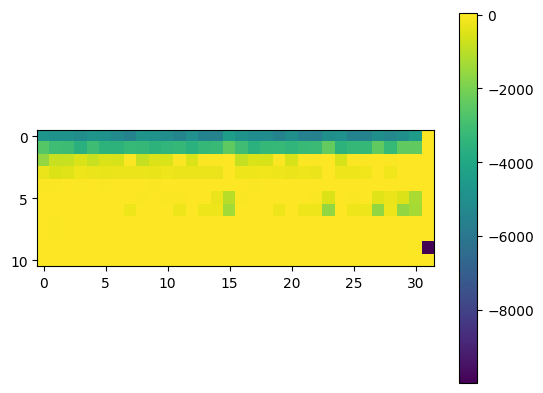

In [733]:
plt.imshow(testo2 - sumsi)
plt.colorbar()

In [14]:
def count_royal_flush_numpy(n_samples, batch=200_000, rng=None):
    if rng is None:
        rng = np.random.default_rng()
    target = np.array([8,9,10,11,12])
    hits = 0
    left = n_samples
    while left > 0:
        b = min(batch, left)
        hands = np.empty((b, 5), dtype=np.int16)
        for i in range(b):
            hands[i] = rng.choice(52, 5, replace=False)
        suits = hands // 13
        same = np.all(suits == suits[:, [0]], axis=1)
        ranks = np.sort(hands % 13, axis=1)
        hits += np.sum(same & np.all(ranks == target, axis=1))
        left -= b
    return hits

start = time.time()
hits = count_royal_flush_numpy(1000000)
end = time.time()
elapsed = end - start
print(hits, elapsed)

4 10.409355878829956


In [ ]:

club = np.array([
    [0,0,0,0,1,1,0,0,0,0],
    [0,0,0,1,1,1,1,0,0,0],
    [0,0,0,1,1,1,1,0,0,0],
    [0,1,1,0,1,1,0,1,1,0],
    [1,1,1,1,1,1,1,1,1,1],
    [1,1,1,1,1,1,1,1,1,1],
    [0,1,1,0,1,1,0,1,1,0],
    [0,0,0,1,1,1,1,0,0,0]
], dtype=np.uint8)
diamond = np.array([
    [0,0,0,0,1,1,0,0,0,0],
    [0,0,0,1,1,1,1,0,0,0],
    [0,0,1,1,1,1,1,1,0,0],
    [0,1,1,1,1,1,1,1,1,0],
    [0,1,1,1,1,1,1,1,1,0],
    [0,0,1,1,1,1,1,1,0,0],
    [0,0,0,1,1,1,1,0,0,0],
    [0,0,0,0,1,1,0,0,0,0],
], dtype=np.uint8)
heart = np.array([
    [0,1,1,0,0,0,0,1,1,0],
    [1,1,1,1,0,0,1,1,1,1],
    [1,1,1,1,1,1,1,1,1,1],
    [1,1,1,1,1,1,1,1,1,1],
    [0,1,1,1,1,1,1,1,1,0],
    [0,0,1,1,1,1,1,1,0,0],
    [0,0,0,1,1,1,1,0,0,0],
    [0,0,0,0,1,1,0,0,0,0]
], dtype=np.uint8)
spade = np.array([
    [0,0,0,0,1,1,0,0,0,0],
    [0,0,0,1,1,1,1,0,0,0],
    [0,0,1,1,1,1,1,1,0,0],
    [0,1,1,1,1,1,1,1,1,0],
    [1,1,1,1,1,1,1,1,1,1],
    [1,1,1,1,1,1,1,1,1,1],
    [0,1,1,0,1,1,0,1,1,0],
    [0,0,0,1,1,1,1,0,0,0]
], dtype=np.uint8)
two = np.array([
    [0,1,1,1,1,0],
    [1,1,0,0,1,1],
    [0,0,0,0,1,1],
    [0,0,1,1,1,0],
    [0,1,1,0,0,0],
    [1,1,0,0,1,1],
    [1,1,1,1,1,1]
], dtype=np.uint8)
three = np.array([
    [0,1,1,1,1,0],
    [1,1,0,0,1,1],
    [0,0,0,0,1,1],
    [0,0,1,1,1,0],
    [0,0,0,0,1,1],
    [1,1,0,0,1,1],
    [0,1,1,1,1,0]
], dtype=np.uint8)
four = np.array([
    [0,0,0,1,1,0],
    [0,0,1,1,1,0],
    [0,1,1,0,1,0],
    [1,1,0,0,1,0],
    [1,1,1,1,1,1],
    [0,0,0,1,1,0],
    [0,0,1,1,1,1]
])
five = np.array([
    [1,1,1,1,1,1],
    [1,1,0,0,0,0],
    [1,1,1,1,1,0],
    [0,0,0,0,1,1],
    [0,0,0,0,1,1],
    [1,1,0,0,1,1],
    [0,1,1,1,1,0]
])
six = np.array([
    [0,1,1,1,1,0],
    [1,1,0,0,1,1],
    [1,1,0,0,0,0],
    [1,1,1,1,1,0],
    [1,1,0,0,1,1],
    [1,1,0,0,1,1],
    [0,1,1,1,1,0]
])
seven = np.array([
    [1,1,1,1,1,1],
    [1,0,0,0,1,1],
    [0,0,0,1,1,0],
    [0,0,0,1,1,0],
    [0,0,1,1,0,0],
    [0,1,1,0,0,0],
    [0,1,1,0,0,0]
])
eight = np.array([
    [0,1,1,1,1,0],
    [1,1,0,0,1,1],
    [1,1,0,0,1,1],
    [0,1,1,1,1,0],
    [1,1,0,0,1,1],
    [1,1,0,0,1,1],
    [0,1,1,1,1,0]
])
nine = np.array([
    [0,1,1,1,1,0],
    [1,1,0,0,1,1],
    [1,1,0,0,1,1],
    [0,1,1,1,1,1],
    [0,0,0,0,1,1],
    [0,0,0,1,1,0],
    [0,1,1,1,0,0]
])
ten = np.array([
    [0,0,1,1,0,0,0,0,1,1,1,1,0],
    [0,1,1,1,0,0,0,1,1,0,0,1,1],
    [0,0,1,1,0,0,0,1,1,0,0,1,1],
    [0,0,1,1,0,0,0,1,1,0,0,1,1],
    [0,0,1,1,0,0,0,1,1,0,0,1,1],
    [0,0,1,1,0,0,0,1,1,0,0,1,1],
    [1,1,1,1,1,1,0,0,1,1,1,1,0]
])
jack = np.array([
    [0,1,1,1,1,1],
    [0,0,0,1,1,0],
    [0,0,0,1,1,0],
    [0,0,0,1,1,0],
    [1,1,0,1,1,0],
    [1,1,0,1,1,0],
    [0,1,1,1,0,0]
])
queen = np.array([
    [0,1,1,1,1,0],
    [1,1,0,0,1,1],
    [1,1,0,0,1,1],
    [1,1,0,0,1,1],
    [1,1,0,1,1,1],
    [0,1,1,1,1,0],
    [0,0,0,1,1,1]
])
king = np.array([
    [1,1,0,0,1,1],
    [1,1,0,0,1,1],
    [1,1,0,1,1,0],
    [1,1,1,1,0,0],
    [1,1,0,1,1,0],
    [1,1,0,0,1,1],
    [1,1,0,0,1,1]
])
ace = np.array([
    [0,0,1,1,0,0],
    [0,1,1,1,1,0],
    [1,1,0,0,1,1],
    [1,1,0,0,1,1],
    [1,1,1,1,1,1],
    [1,1,0,0,1,1],
    [1,1,0,0,1,1]
])